<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Lanzamiento_de_flechas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Una flecha será ensamblada en un cojinte como se muestra a continuación:

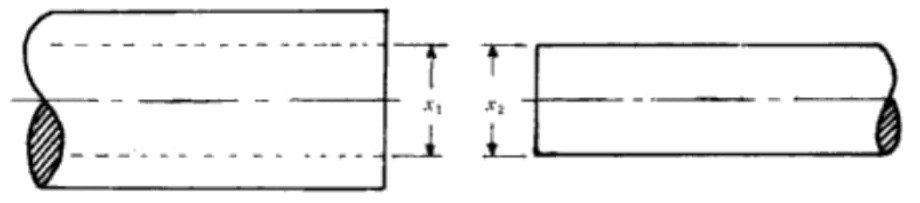

Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016 y $x_2$ sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:


1.   La probabilidad de que haya interferencia
2.   El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.



Las variables aleatorias son
$$x_1 \sim \mathcal{N}(1.5, 0.04)$$
$$x_2 \sim \mathcal{N}(1.48, 0.003)$$

Modelado de $x_1$ y $x_2$

In [67]:
import numpy as np

mu1, mu2 = 1.5, 1.48
s1, s2 = 0.04, 0.03

x1 = np.random.normal(mu1, s1, 1)
x2 = np.random.normal(mu2, s2, 1)

print(f"x1 = {x1[0]}")
print(f"x2 = {x2[0]}")

x1 = 1.5136410285749573
x2 = 1.51935261440616


Experimento

In [149]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

def experiment(n):
    e = 0                                   # Inicializa un contador para los casos en los que x2 >= x1
    for i in range(n):                      # Repite el experimento 'n' veces
        x1 = np.random.normal(mu1, s1, 1)   # Genera un número aleatorio x1 de una normal con media mu1 y desviación estándar s1
        x2 = np.random.normal(mu2, s2, 1)   # Genera un número aleatorio x2 de una normal con media mu2 y desviación estándar s2
        if x2 >= x1:                        # Compara ambos valores
            e += 1
    return e/n                              # Devuelve la proporción de veces que x2 fue mayor o igual que x1

Simulación del experimento $n$ veces

In [246]:
n = 97                              # Número total de simulaciones a realizar
x = []                              # Lista para guardar los resultados de cada experimento
for i in range(1, n + 1):
    x.append(experiment(i))         # Ejecuta el experimento con i repeticiones y guarda el resultado

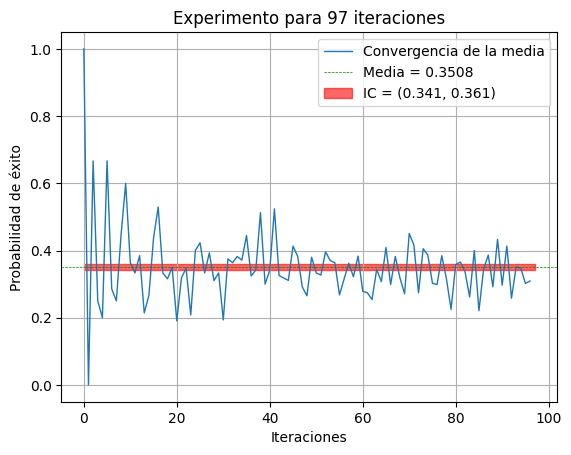

In [248]:
s_g = np.sqrt((s1**2 + s2**2))      # Desviación estándar combinada de las dos distribuciones normales
alpha = 0.05                        # Nivel de significancia para el intervalo de confianza (95%)
Z_a2 = norm.ppf(1 - alpha/2)        # Valor crítico Z
E = Z_a2*s_g/np.sqrt(n)             # Error máximo permitido (margen de error) para el intervalo de confianza

mu = np.mean(x)                     # Media de todas los experimentos
sigma = np.std(x)                   # Desviación estándar de los experimentos

plt.plot(x, linewidth = 1, label="Convergencia de la media")  # Grafica cómo varía la proporción con el número de repeticiones
plt.title(f"Experimento para {n} iteraciones")
plt.xlabel("Iteraciones")
plt.ylabel("Probabilidad de éxito")
plt.axhline(y=mu, linewidth=0.5, color="g", linestyle='--', label=f'Media = {round(mu, 4)}')
plt.fill_between((0, n),
                 (mu - E, mu - E),
                 (mu + E, mu + E),
                 color="r", alpha=0.6, label=f"IC = ({round(mu - E, 3)}, {round(mu + E, 3)})")
#plt.ylim(mu - E - 0.01, mu + E + 0.01)
plt.grid()
plt.legend(loc="best")
plt.show()


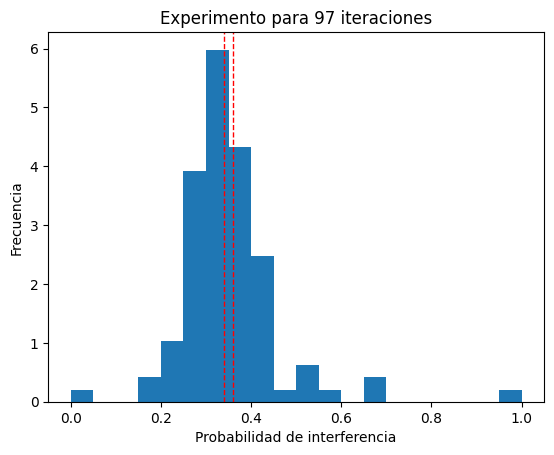

In [255]:
plt.hist(x, bins = 20, density = True)
plt.title(f"Experimento para {n} iteraciones")
plt.xlabel("Probabilidad de interferencia")
plt.axvline(x = mu - E, color="r", linestyle="--", linewidth=1)
plt.axvline(x = mu + E, color="r", linestyle="--", linewidth=1)
plt.ylabel("Frecuencia")
plt.show()

In [250]:
print(f"La probabilidad de interferencia es {round(mu*100, 3)}%")
print(f"Con una confianza del {(1 - alpha)*100}%, IC = ({round(mu - E, 6)}, {round(mu + E, 6)})")

La probabilidad de interferencia es 35.084%
Con una confianza del 95.0%, IC = (0.340894, 0.360794)


# Probabilidad de interferencia analíticamente:
Queremos obtener
$$P(x_2 \ge x_1) = P(x_2 - x_1 \ge 0)$$
Por el Teorema del Límite central
$$x_2 - x_1 \sim \mathcal{N}\left(\mu_2 - \mu_1, \sqrt{\sigma_2^2 + \sigma_2^2}\right)$$
Así
$$Z = \frac{x_2 - x_1 - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}} \sim \mathcal{N}(0, 1)$$
Luego
$$P(x_2 - x_1 \ge 0) = P\left(\frac{x_2 - x_1 - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}} \ge \frac{ - (\mu_2 - \mu_1)}{\sqrt{\sigma_2^2 + \sigma_1^2}}\right) = P\left(Z \ge \frac{ \mu_1 - \mu_2}{\sqrt{\sigma_2^2 + \sigma_1^2}}\right)$$
Sustituyendo nuestros valores, queremos calcular
$$P(Z \ge 0.4) = \int_{0.4}^\infty \frac{1}{\sqrt{2\pi}}e^{-z^2/2}dz$$

In [227]:
from scipy.integrate import quad

a = (mu1 - mu2)/s_g

# Densidad de la normal estándar
f_z = lambda z: (1/np.sqrt(2*np.pi))*np.exp(-z**2/2)

# Integral desde a hasta ∞
p, _ = quad(f_z, a, np.inf)

print(f"P(Z ≥ {a:.1f}) = {p*100}%")

P(Z ≥ 0.4) = 34.45782583896757%


# Número de veces de simulación del experimento para que $E < 0.01$

Tenemos que
$$E = \frac{Z_{\alpha/2}\hat{s}}{\sqrt{n}}$$
Y queremos
$$E < \epsilon$$
Así
$$\frac{Z_{\alpha/2}\hat{s}}{\sqrt{n}} < \epsilon$$
$$\rightarrow n > \left(\frac{Z_{\alpha/2}\hat{s}}{\epsilon}\right)^2$$

In [245]:
epsilon = 0.01
n = (Z_a2*s_g/epsilon)**2
print(f"Se necesitan al menos {int(np.ceil(n))} iteraciones para un error de {epsilon}")

Se necesitan al menos 97 iteraciones para un error de 0.01
